In [4]:
import time
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manaure
Processing Record 2 of Set 1 | sawakin
Processing Record 3 of Set 1 | bridlington
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | fernie
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | katherine
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | kamaishi
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | birao
Processing Record 17 of Set 1 | gondanglegi
Processing Record 18 of Set 1 | vestmanna
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | jalu
Processing Record 22 of Set 1 | urucara
Processing Record 23 of Set 1 | ta

Processing Record 35 of Set 4 | bengkulu
Processing Record 36 of Set 4 | moron
Processing Record 37 of Set 4 | kuito
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | puerto ayora
Processing Record 40 of Set 4 | qinhuangdao
Processing Record 41 of Set 4 | egvekinot
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | pangkalanbuun
Processing Record 44 of Set 4 | ozinki
Processing Record 45 of Set 4 | davis
Processing Record 46 of Set 4 | sarmanovo
Processing Record 47 of Set 4 | waipawa
Processing Record 48 of Set 4 | muros
Processing Record 49 of Set 4 | banda aceh
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | yumen
Processing Record 2 of Set 5 | batagay-alyta
Processing Record 3 of Set 5 | ketchikan
Processing Record 4 of Set 5 | monte patria
Processing Record 5 of Set 5 | muridke
Processing Record 6 of Set 5 | kenai
Processing Record 7 of Set 5 | andenes
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Se

Processing Record 27 of Set 8 | baherden
Processing Record 28 of Set 8 | fortuna
Processing Record 29 of Set 8 | broken hill
Processing Record 30 of Set 8 | norfolk
Processing Record 31 of Set 8 | lolua
City not found. Skipping...
Processing Record 32 of Set 8 | yagodnoye
Processing Record 33 of Set 8 | elizabeth city
Processing Record 34 of Set 8 | stokmarknes
Processing Record 35 of Set 8 | port macquarie
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | ano mera
Processing Record 38 of Set 8 | bontang
Processing Record 39 of Set 8 | nelspruit
Processing Record 40 of Set 8 | krasnik
Processing Record 41 of Set 8 | salina
Processing Record 42 of Set 8 | campoverde
Processing Record 43 of Set 8 | esfahan
Processing Record 44 of Set 8 | parabel
Processing Record 45 of Set 8 | henties bay
Processing Record 46 of Set 8 | riohacha
Processing Record 47 of Set 8 | saryozek
Processing Record 48 of Set 8 | tandil
Processing Record 49 of Set 8 | andevoranto
City not found. 

City not found. Skipping...
Processing Record 16 of Set 12 | pochutla
Processing Record 17 of Set 12 | homer
Processing Record 18 of Set 12 | alofi
Processing Record 19 of Set 12 | pemberton
Processing Record 20 of Set 12 | bestobe
Processing Record 21 of Set 12 | sven
Processing Record 22 of Set 12 | buala
Processing Record 23 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 24 of Set 12 | qujing
Processing Record 25 of Set 12 | roma
Processing Record 26 of Set 12 | kisangani
Processing Record 27 of Set 12 | orlik
Processing Record 28 of Set 12 | okhotsk
Processing Record 29 of Set 12 | banamba
Processing Record 30 of Set 12 | itaocara
Processing Record 31 of Set 12 | maldonado
Processing Record 32 of Set 12 | wawa
Processing Record 33 of Set 12 | mishan
Processing Record 34 of Set 12 | rudnogorsk
Processing Record 35 of Set 12 | pangnirtung
Processing Record 36 of Set 12 | filadelfia
Processing Record 37 of Set 12 | preston
Processing Record 38 of Set 12 | raymondvi

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manaure,11.7751,-72.4445,77.05,77,60,7.27,CO,2021-12-21 04:45:23
1,Sawakin,19.1059,37.3321,73.17,59,100,12.73,SD,2021-12-21 04:45:24
2,Bridlington,54.0831,-0.1919,40.89,62,99,1.72,GB,2021-12-21 04:45:24
3,Port Elizabeth,-33.9180,25.5701,70.11,100,75,13.80,ZA,2021-12-21 04:42:11
4,Fernie,49.5000,-115.0687,23.09,99,98,1.81,CA,2021-12-21 04:45:25
5,Leningradskiy,69.3833,178.4167,-8.57,67,100,24.65,RU,2021-12-21 04:45:26
6,Torbay,47.6666,-52.7314,20.57,79,20,13.80,CA,2021-12-21 04:45:26
7,Katherine,-14.4667,132.2667,95.32,43,40,1.14,AU,2021-12-21 04:45:27
8,San Patricio,28.0170,-97.5169,57.06,72,0,5.77,US,2021-12-21 04:45:27
9,Kamaishi,39.2667,141.8833,41.95,64,62,8.32,JP,2021-12-21 04:45:28


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manaure,CO,2021-12-21 04:45:23,11.7751,-72.4445,77.05,77,60,7.27
1,Sawakin,SD,2021-12-21 04:45:24,19.1059,37.3321,73.17,59,100,12.73
2,Bridlington,GB,2021-12-21 04:45:24,54.0831,-0.1919,40.89,62,99,1.72
3,Port Elizabeth,ZA,2021-12-21 04:42:11,-33.9180,25.5701,70.11,100,75,13.80
4,Fernie,CA,2021-12-21 04:45:25,49.5000,-115.0687,23.09,99,98,1.81
5,Leningradskiy,RU,2021-12-21 04:45:26,69.3833,178.4167,-8.57,67,100,24.65
6,Torbay,CA,2021-12-21 04:45:26,47.6666,-52.7314,20.57,79,20,13.80
7,Katherine,AU,2021-12-21 04:45:27,-14.4667,132.2667,95.32,43,40,1.14
8,San Patricio,US,2021-12-21 04:45:27,28.0170,-97.5169,57.06,72,0,5.77
9,Kamaishi,JP,2021-12-21 04:45:28,39.2667,141.8833,41.95,64,62,8.32


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

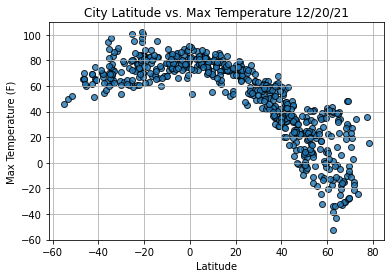

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

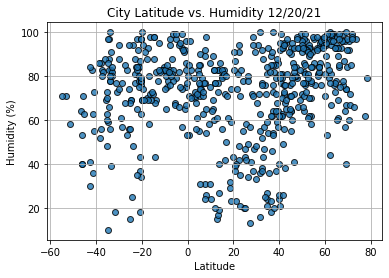

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


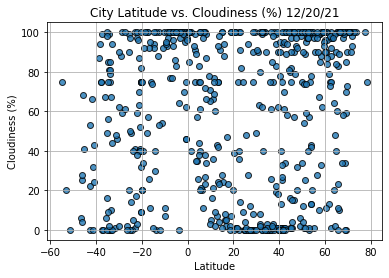

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()